In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'telco-customer-churn:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F13996%2F18858%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241007%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241007T150954Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D997835a902b5cf4baa19eaa2941fbf1e7a9b7733216deb82dded3ce3ac1689c27adda3578e1c02f3d1ef91407a8cad2a6ac303aa0c2bc22739ad48ac0b9a89f6908f5e6514de0215a0d73b802af2e78d2065f2c55f98a9e3e4717f415b8158b4b1955b03e85623a6d2aade8eec5ac2381c9ad21ffc62d2b842b52adc9b07a028c534505b99061a2d3b1f32e3d63ff6c4beea5a1a76faada578c98a0a6e954281c3c1b8d4f4752d470783d8549fbe67954a6db58b8b5cf88441b73d255750e9453a5e9a8ac44ab250d121670386633e9866cda12d07c40f10a15fffb409794b601e1c1d2a5f3a37ccf2bc60c26613f5cb3c8fb9f9847d157d211dce8c32642c4c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
file_path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


import library yang dibutuhkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

melihat dataframe

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


 memahami deskripsi variabel pada data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


dari info di atas, Jumlah sampel: 7043 entri.
Kolom TotalCharges: Teridentifikasi sebagai object, padahal seharusnya numerik. Perlu dikonversi. nanti akan kita ubah

Melihat informasi statistik

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


 mengetahui apakah ada nilai kosong (null/missing value)

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada missing value sejauh ini

Mengelompokkan numerical dan categorical features

In [ ]:
categorical_features = [
    'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'
]

numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges']

melihat histogram masing-masing fitur numerik

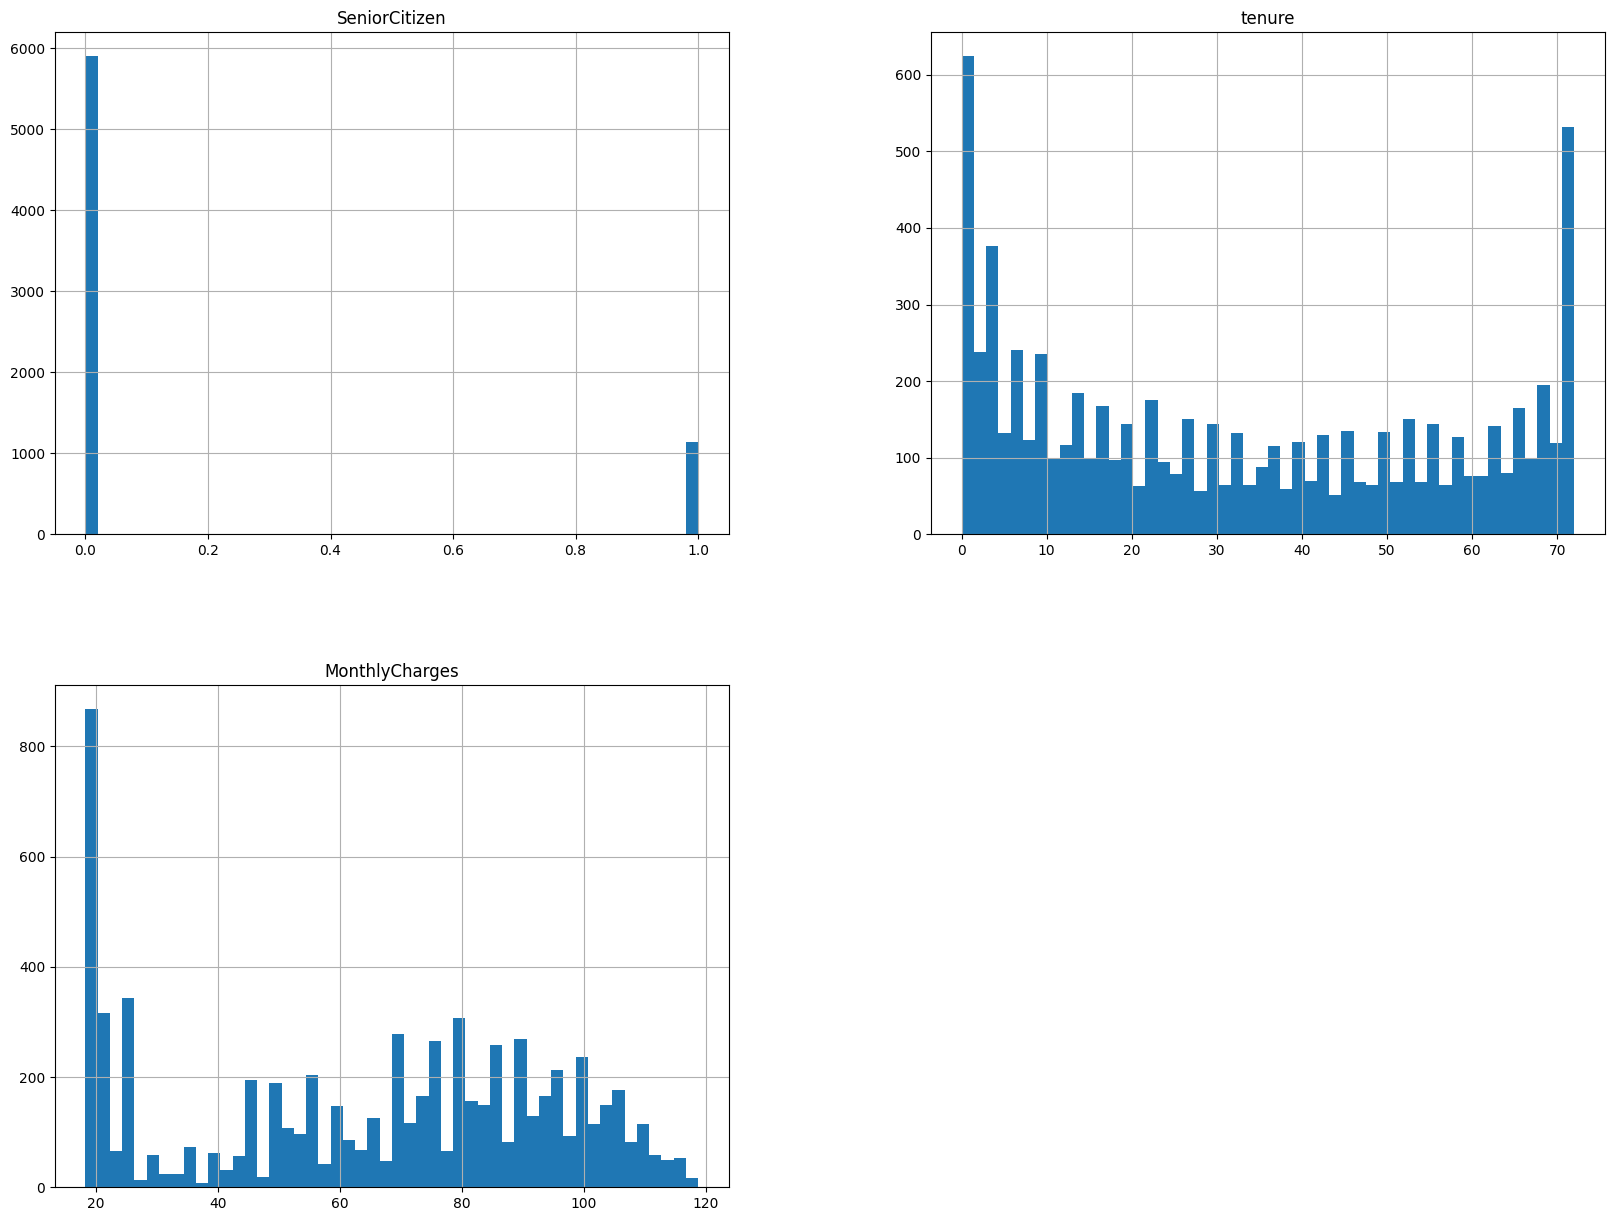

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Kita dapat mengetahui


*   pelanggan yang bukan warga senior (1) lebih banyak daripada yang senior (0)
*   Lama waktu pelanggan berlangganan (dalam bulan) cukup bervariasi
*   dan biaya bulanan/MonthlyCharges yang dibayar oleh pelanggan lebih banyak yang murah daripada berlangganan yang mahal



Loop untuk semua fitur kategorikal

Feature: customerID
            Jumlah Sampel  Persentase (%)
customerID                               
7590-VHVEG              1             0.0
3791-LGQCY              1             0.0
6008-NAIXK              1             0.0
5956-YHHRX              1             0.0
5365-LLFYV              1             0.0
...                   ...             ...
9796-MVYXX              1             0.0
2637-FKFSY              1             0.0
1552-AAGRX              1             0.0
4304-TSPVK              1             0.0
3186-AJIEK              1             0.0

[7043 rows x 2 columns]


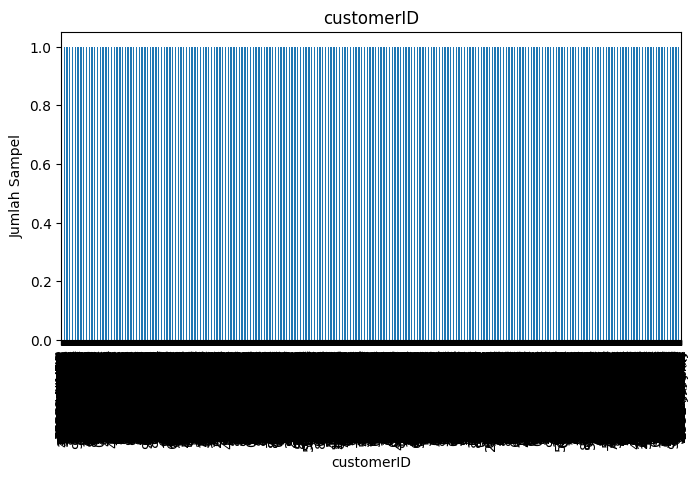

Feature: gender
        Jumlah Sampel  Persentase (%)
gender                               
Male             3555            50.5
Female           3488            49.5


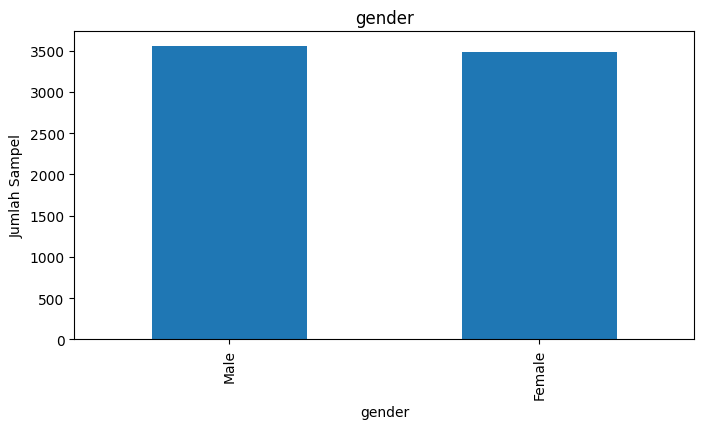

Feature: Partner
         Jumlah Sampel  Persentase (%)
Partner                               
No                3641            51.7
Yes               3402            48.3


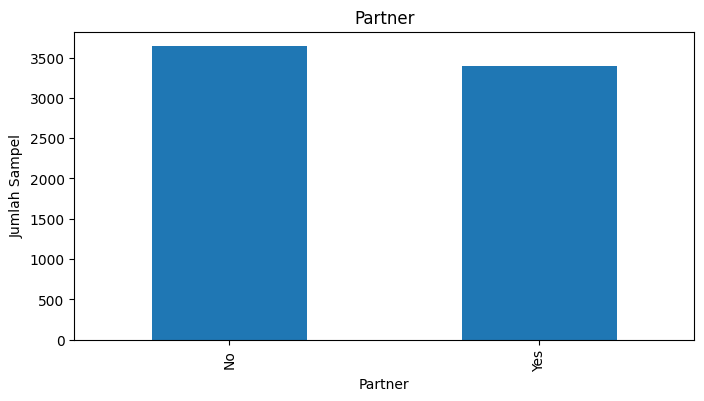

Feature: Dependents
            Jumlah Sampel  Persentase (%)
Dependents                               
No                   4933            70.0
Yes                  2110            30.0


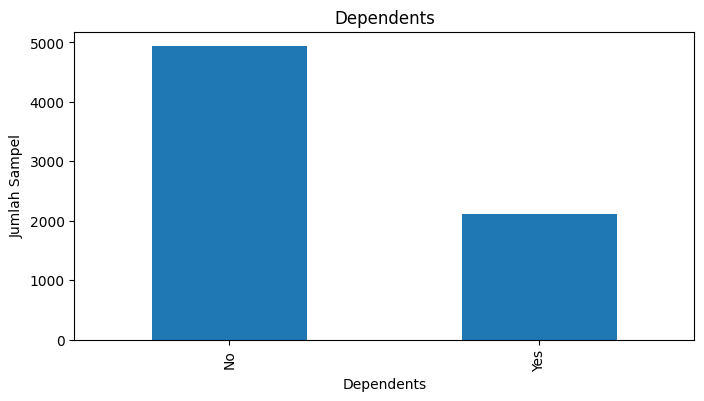

Feature: PhoneService
              Jumlah Sampel  Persentase (%)
PhoneService                               
Yes                    6361            90.3
No                      682             9.7


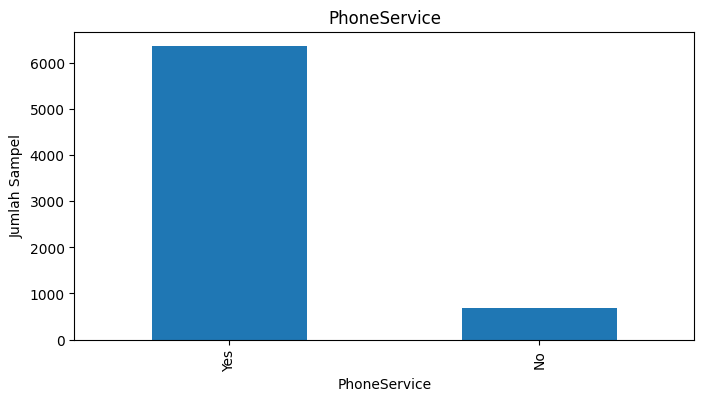

Feature: MultipleLines
                  Jumlah Sampel  Persentase (%)
MultipleLines                                  
No                         3390            48.1
Yes                        2971            42.2
No phone service            682             9.7


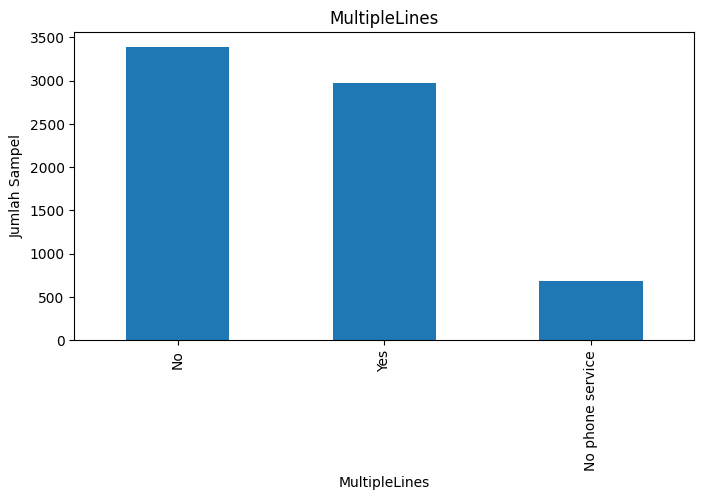

Feature: InternetService
                 Jumlah Sampel  Persentase (%)
InternetService                               
Fiber optic               3096            44.0
DSL                       2421            34.4
No                        1526            21.7


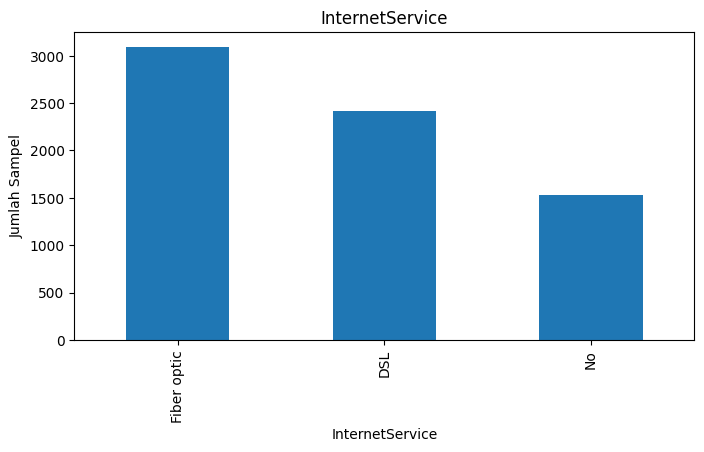

Feature: OnlineSecurity
                     Jumlah Sampel  Persentase (%)
OnlineSecurity                                    
No                            3498            49.7
Yes                           2019            28.7
No internet service           1526            21.7


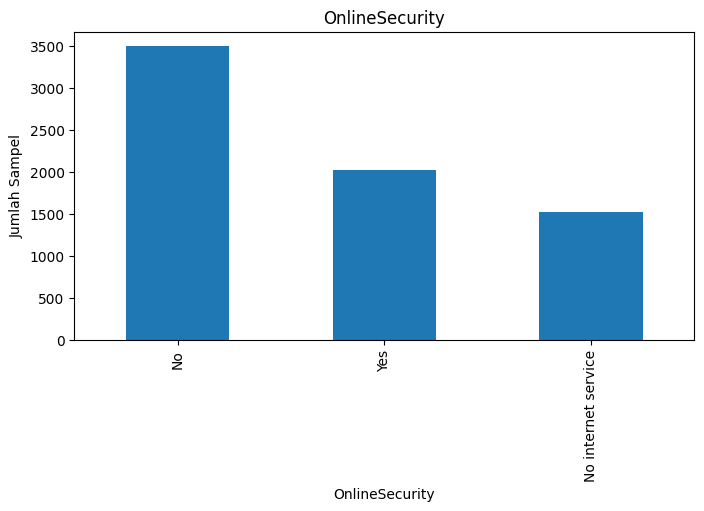

Feature: OnlineBackup
                     Jumlah Sampel  Persentase (%)
OnlineBackup                                      
No                            3088            43.8
Yes                           2429            34.5
No internet service           1526            21.7


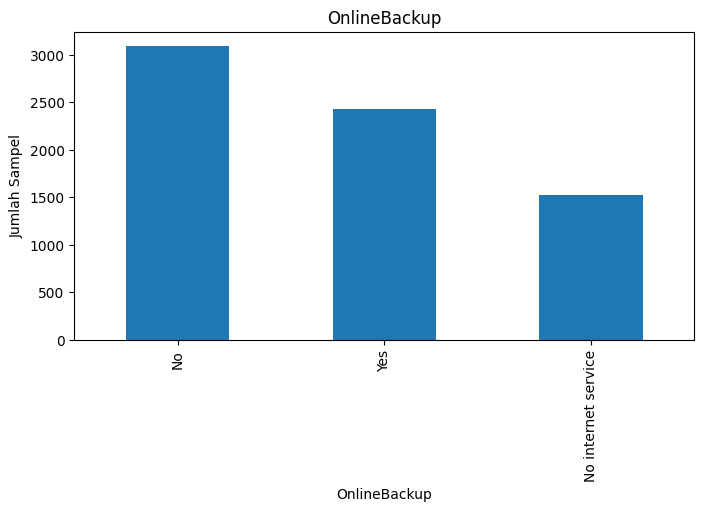

Feature: DeviceProtection
                     Jumlah Sampel  Persentase (%)
DeviceProtection                                  
No                            3095            43.9
Yes                           2422            34.4
No internet service           1526            21.7


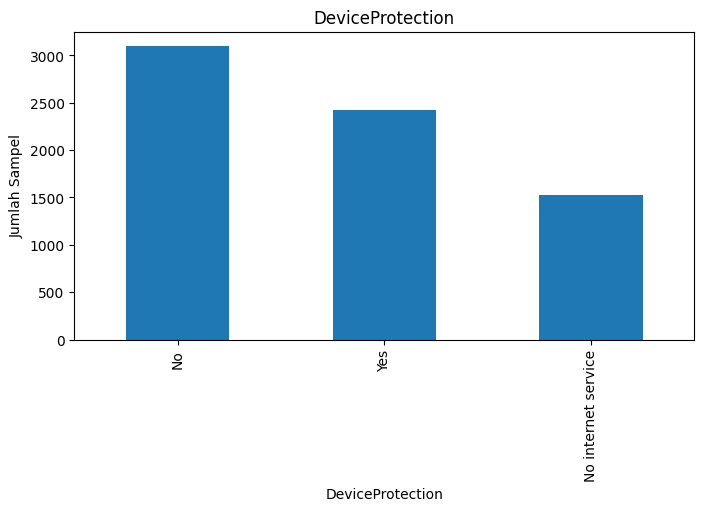

Feature: TechSupport
                     Jumlah Sampel  Persentase (%)
TechSupport                                       
No                            3473            49.3
Yes                           2044            29.0
No internet service           1526            21.7


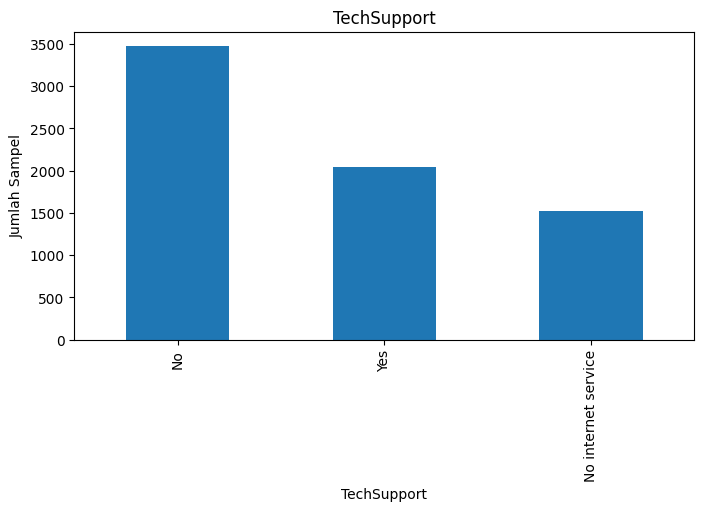

Feature: StreamingTV
                     Jumlah Sampel  Persentase (%)
StreamingTV                                       
No                            2810            39.9
Yes                           2707            38.4
No internet service           1526            21.7


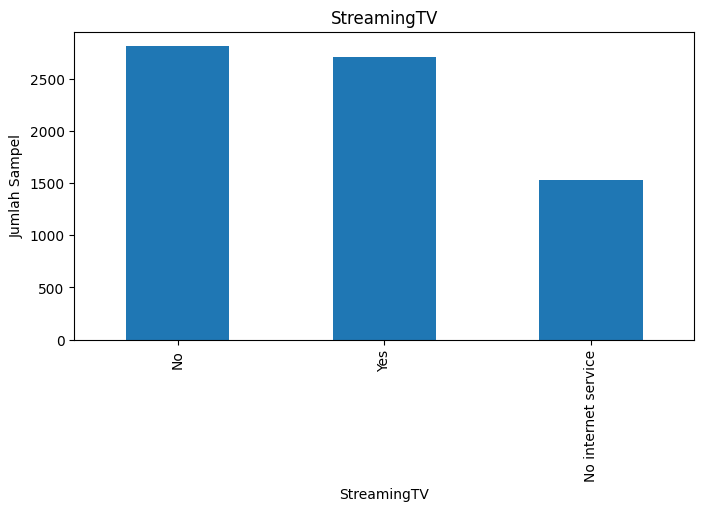

Feature: StreamingMovies
                     Jumlah Sampel  Persentase (%)
StreamingMovies                                   
No                            2785            39.5
Yes                           2732            38.8
No internet service           1526            21.7


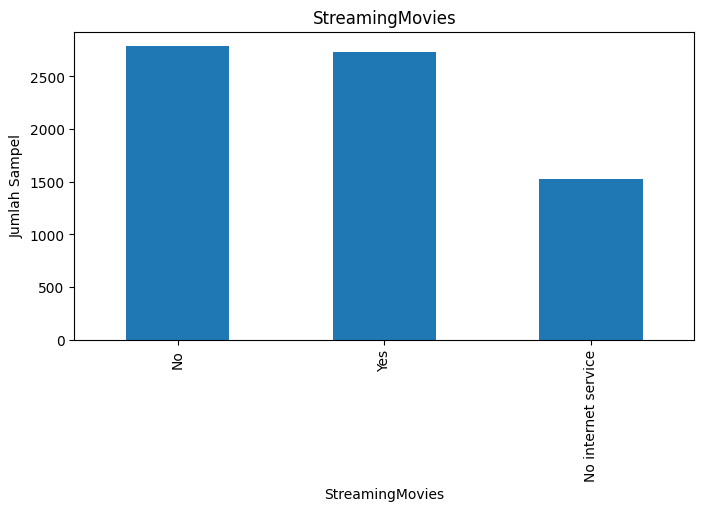

Feature: Contract
                Jumlah Sampel  Persentase (%)
Contract                                     
Month-to-month           3875            55.0
Two year                 1695            24.1
One year                 1473            20.9


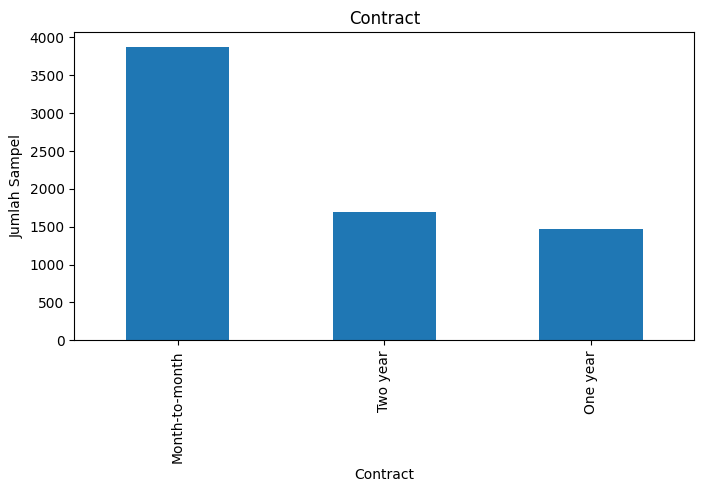

Feature: PaperlessBilling
                  Jumlah Sampel  Persentase (%)
PaperlessBilling                               
Yes                        4171            59.2
No                         2872            40.8


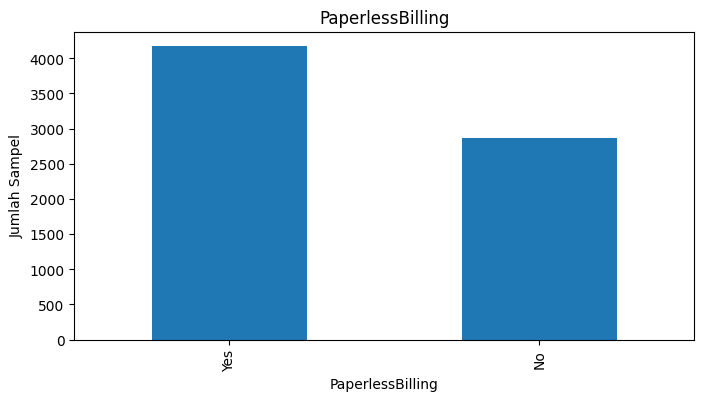

Feature: PaymentMethod
                           Jumlah Sampel  Persentase (%)
PaymentMethod                                           
Electronic check                    2365            33.6
Mailed check                        1612            22.9
Bank transfer (automatic)           1544            21.9
Credit card (automatic)             1522            21.6


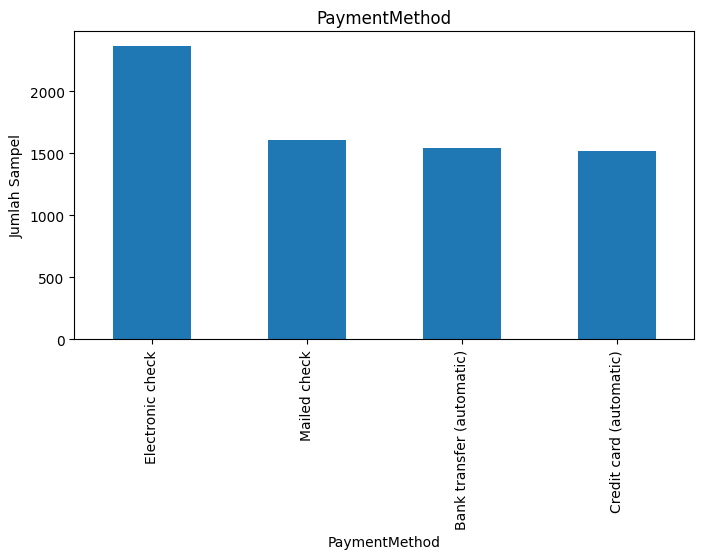

Feature: TotalCharges
              Jumlah Sampel  Persentase (%)
TotalCharges                               
                         11             0.2
20.2                     11             0.2
19.75                     9             0.1
20.05                     8             0.1
19.9                      8             0.1
...                     ...             ...
6849.4                    1             0.0
692.35                    1             0.0
130.15                    1             0.0
3211.9                    1             0.0
6844.5                    1             0.0

[6531 rows x 2 columns]


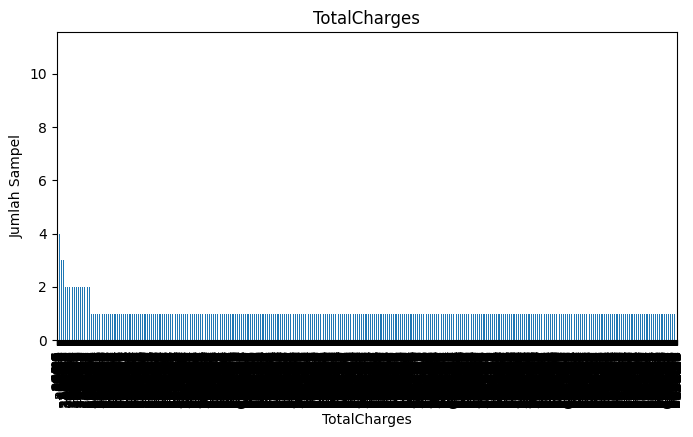

Feature: Churn
       Jumlah Sampel  Persentase (%)
Churn                               
No              5174            73.5
Yes             1869            26.5


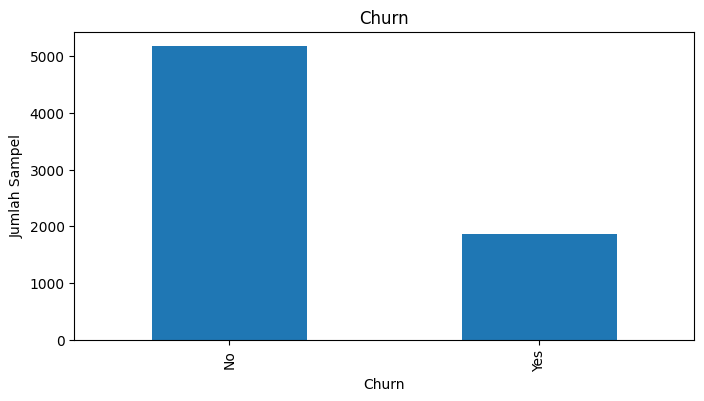

In [ ]:
for feature in categorical_features:
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    df2 = pd.DataFrame({'Jumlah Sampel': count, 'Persentase (%)': percent.round(1)})

    # Menampilkan dataframe
    print(f"Feature: {feature}")
    print(df2)

    # Plot histogram untuk masing-masing fitur
    plt.figure(figsize=(8, 4))
    count.plot(kind='bar', title=feature)
    plt.ylabel('Jumlah Sampel')
    plt.show()


dari visualisasi di atas,

*   Kolom customer id tidak relevan untuk analisis dan pemodelan karena hanya merupakan identifikasi unik pelanggan. Oleh karena itu, kolom ini bisa dihapus.
*   Kolom TotalCharges Saat ini bertipe object, padahal seharusnya bernilai numerik. Kita perlu melakukan konversi tipe data untuk memungkinkan operasi matematis dan analisis lebih lanjut pada kolom ini.


Menghapus kolom customerID

In [ ]:
df = df.drop(columns=['customerID'])


Melihat kolom customerID apakah sudah terhapus

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Mengamati hubungan antar fitur numerik dengan fungsi pairplot()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


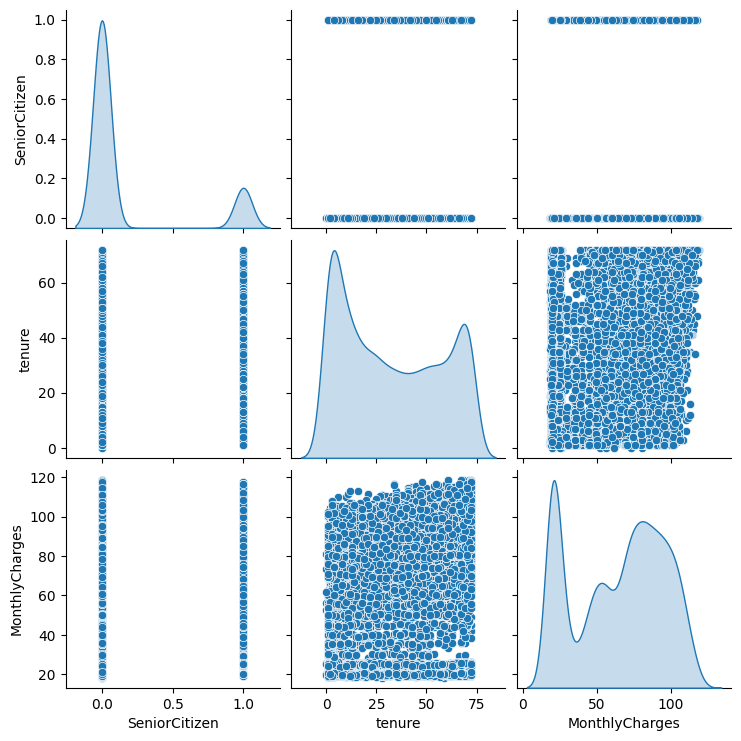

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Dari visualisasi di atas, tidak ada pola/trend tertentu, mari lanjut ke tahap berikutnya

sekarang hubungan antar fitur dengan matrix korelasi

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

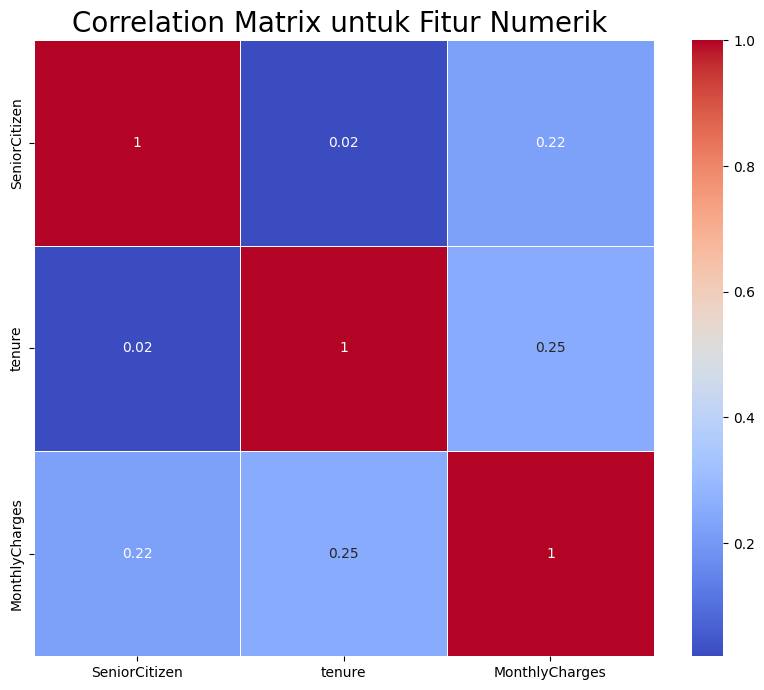

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)



*   SeniorCitizen vs. tenure: Korelasi sebesar 0.02, yang sangat rendah, menunjukkan hampir tidak ada hubungan antara menjadi senior citizen dan lama waktu berlangganan (tenure).
*   SeniorCitizen vs. MonthlyCharges: Korelasi sebesar 0.22, yang menunjukkan hubungan yang lemah namun positif. Artinya, meskipun lemah, ada kecenderungan kecil bahwa senior citizen mungkin memiliki tagihan bulanan yang lebih tinggi.
*   tenure vs. MonthlyCharges: Korelasi sebesar 0.25, menunjukkan hubungan yang sedikit lebih kuat namun masih lemah. Ini berarti bahwa semakin lama seseorang menjadi pelanggan, ada kecenderungan kecil mereka memiliki tagihan bulanan yang lebih tinggi.

Secara keseluruhan, korelasi di sini menunjukkan bahwa tidak ada hubungan yang sangat kuat antara variabel-variabel ini.


Melakukan One Hot Encoding untuk semua fitur kategorikal kecuali 'Churn' dan 'TotalCharges'

One Hot Encoding dilakukan untuk memberikan representasi numerik yang diperlukan untuk model machine learning tanpa memberikan bobot tambahan pada kategori tertentu. Dalam hal ini, nilai True menunjukkan kehadiran fitur tertentu, sedangkan False menunjukkan sebaliknya, sehingga memungkinkan model untuk memahami informasi yang lebih baik dalam konteks klasifikasi churn pelanggan.

In [ ]:
# Daftar fitur kategorikal, kecuali kolom 'Churn' dan , 'TotalCharges'
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Lakukan One Hot Encoding untuk semua fitur kategorikal kecuali 'Churn'
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=False)

melihat info dataframe setelah melakukan one hot encoding

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   object 
 4   Churn                                    7043 non-null   object 
 5   gender_Female                            7043 non-null   bool   
 6   gender_Male                              7043 non-null   bool   
 7   Partner_No                               7043 non-null   bool   
 8   Partner_Yes                              7043 non-null   bool   
 9   Dependents_No                            7043 non-null   bool   
 10  Dependents_Yes                           7043 no

melihat dataframe setelah melakukan one hot encoding

In [ ]:
df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.5,No,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,No,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,Yes,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,No,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.9,No,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,No,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,306.6,Yes,False,True,False,True,True,...,False,True,False,False,False,True,False,False,False,True


Sekarang kita akan mengUbah 'TotalCharges' menjadi numerik

melakukan konversi kolom TotalCharges dari tipe data object menjadi tipe numerik (float64). Proses ini penting karena kolom TotalCharges seharusnya menyimpan nilai numerik yang merepresentasikan total biaya, dan kita perlu melakukan perhitungan matematis pada data tersebut.

In [ ]:

df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'], errors='coerce')

# Cek apakah ada nilai NaN setelah konversi
print(df_encoded['TotalCharges'].isnull().sum())

11


karena terdapat nilai NaN, kita harus menangani data tersebut, lebih baik lihat dulu statistiknya

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


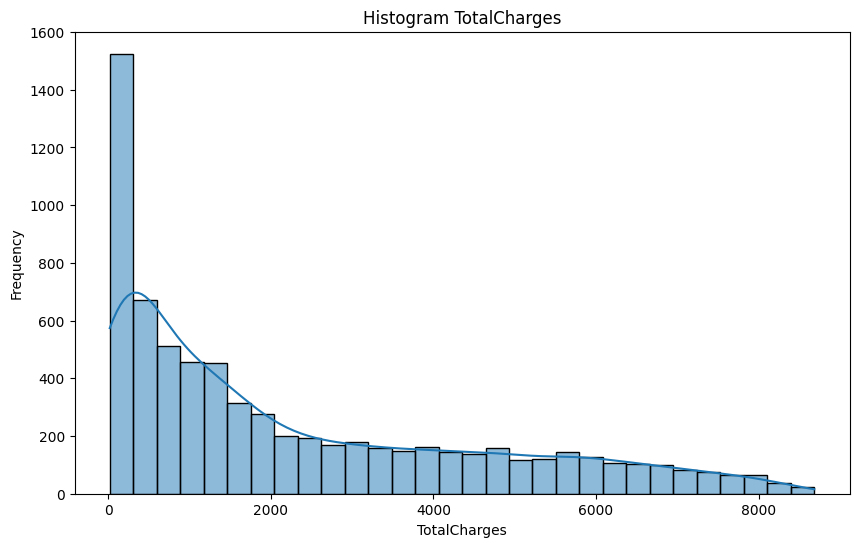

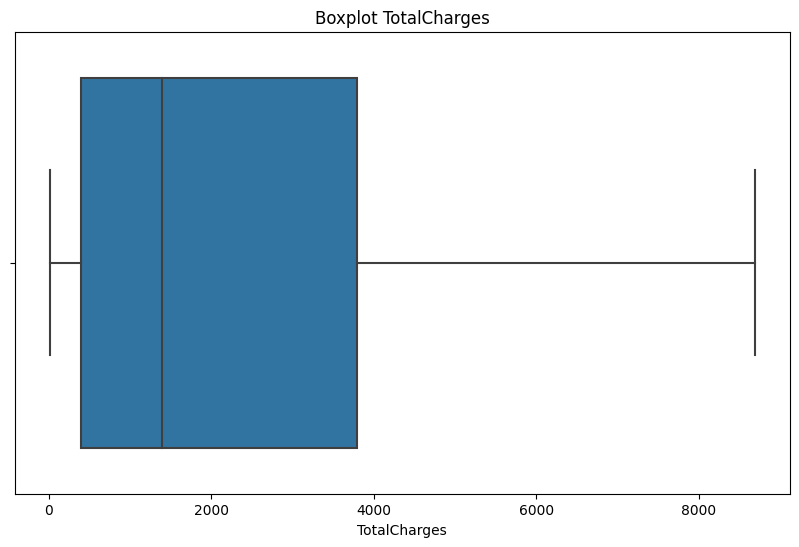

In [ ]:
# Cek statistik deskriptif untuk TotalCharges
print(df_encoded['TotalCharges'].describe())

# Visualisasi persebaran data dengan histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['TotalCharges'], bins=30, kde=True)
plt.title('Histogram TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()

# Visualisasi boxplot untuk mendeteksi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_encoded['TotalCharges'])
plt.title('Boxplot TotalCharges')
plt.show()

Dari visualisasi yang telah dilakukan, kita memperoleh beberapa insight mengenai distribusi kolom


1.   Distribusi Right-Skewed:


  *   Distribusi data pada kolom TotalCharges menunjukkan pola right-skewed, di mana sebagian besar nilai terkonsentrasi di sisi kiri (nilai yang lebih rendah), sementara ada sedikit nilai yang lebih tinggi di sisi kanan.
  *   Kondisi ini sering kali terjadi dalam data yang merepresentasikan biaya, di mana sebagian besar pelanggan memiliki biaya rendah dan hanya beberapa yang memiliki biaya sangat tinggi.


2.   Ketiadaan Outlier:

  *   Dari analisis menggunakan boxplot, tidak terdeteksi adanya outlier. Ini menunjukkan bahwa data dalam kolom TotalCharges tidak memiliki nilai ekstrem yang signifikan, yang berarti kita dapat lebih percaya diri dalam melakukan imputasi untuk nilai kosong tanpa terpengaruh oleh nilai-nilai yang tidak biasa.


3.  Penggantian Nilai Kosong dengan Median:


*   Karena distribusi data skewed ke kanan, lebih bijaksana untuk mengganti nilai kosong dengan median daripada rata-rata.
*   Median adalah nilai tengah dari data, yang lebih tahan terhadap kemiringan dan tidak terpengaruh oleh nilai ekstrim. Ini membuat median menjadi pilihan yang lebih baik untuk menggantikan nilai yang hilang dalam konteks data yang tidak terdistribusi normal.





In [ ]:
# Ganti nilai kosong di kolom 'TotalCharges' dengan median
df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'], errors='coerce')
median_totalcharges = df_encoded['TotalCharges'].median()
df_encoded['TotalCharges'].fillna(median_totalcharges, inplace=True)

# Cek kembali apakah masih ada nilai kosong
print(df_encoded['TotalCharges'].isnull().sum())

0


/tmp/ipykernel_30/2587110168.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['TotalCharges'].fillna(median_totalcharges, inplace=True)


Melihat ringkasan informasi mengenai DataFrame saat ini

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   Churn                                    7043 non-null   object 
 5   gender_Female                            7043 non-null   bool   
 6   gender_Male                              7043 non-null   bool   
 7   Partner_No                               7043 non-null   bool   
 8   Partner_Yes                              7043 non-null   bool   
 9   Dependents_No                            7043 non-null   bool   
 10  Dependents_Yes                           7043 no

Standarisasi


Standarisasi adalah proses mengubah fitur numerik menjadi skala yang sama, dengan mean 0 dan deviasi standar 1. Ini penting karena:


*   Menyamakan Skala
*   Meningkatkan Kinerja Model



In [ ]:
# Tentukan fitur numerik dan biner (hasil One Hot Encoding)
features_to_scale = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']  # Sudah numerik

# Standarisasi data (PCA sensitif terhadap skala data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded[features_to_scale])

menyatukan kolom dari standarisasi ke dataframe

In [ ]:
# Buat DataFrame dari hasil standarisasi
df_scaled = pd.DataFrame(X_scaled, columns=features_to_scale)

# Gabungkan dengan kolom lainnya dari df_encoded
df_final = pd.concat([df_encoded.drop(columns=features_to_scale).reset_index(drop=True), df_scaled.reset_index(drop=True)], axis=1)

# Tampilkan hasil akhir
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7043 non-null   object 
 1   gender_Female                            7043 non-null   bool   
 2   gender_Male                              7043 non-null   bool   
 3   Partner_No                               7043 non-null   bool   
 4   Partner_Yes                              7043 non-null   bool   
 5   Dependents_No                            7043 non-null   bool   
 6   Dependents_Yes                           7043 non-null   bool   
 7   PhoneService_No                          7043 non-null   bool   
 8   PhoneService_Yes                         7043 non-null   bool   
 9   MultipleLines_No                         7043 non-null   bool   
 10  MultipleLines_No phone service           7043 no

kolom seperti SeniorCitizen, tenure, MonthlyCharges, dan TotalCharges sekarang sudah bertipe float64. Ini berarti bahwa kolom-kolom tersebut sudah siap untuk digunakan dalam analisis atau pelatihan model.

Tampilkan deskripsi statistik untuk keempat kolom yang distandarisasi

In [ ]:
df_final[features_to_scale].describe().round(4)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.0000,7043.0000,7043.0000,7043.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001
min,-0.4399,-1.3182,-1.5459,-0.9991
25%,-0.4399,-0.9517,-0.9725,-0.8298
50%,-0.4399,-0.1373,0.1857,-0.3905
75%,-0.4399,0.9215,0.8338,0.6643
max,2.2732,1.6137,1.7944,2.8267



*   Mean: Rata-rata nilai untuk semua fitur distandarisasi mendekati 0, menunjukkan bahwa data telah terskalakan dengan baik.

*   Standar Deviasi (std): Semua fitur memiliki standar deviasi sekitar 1, yang merupakan karakteristik dari data yang distandarisasi.

*  Min dan Max: Rentang nilai untuk setiap fitur menunjukkan variabilitas data setelah distandarisasi. Nilai ekstrem (min dan max) terdistribusi dengan baik, dan tidak ada outlier signifikan.

In [ ]:
df_final

,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,No,True,False,False,True,True,False,True,False,False,...,False,True,False,False,True,False,-0.439916,-1.277445,-1.160323,-0.994242
1,No,False,True,True,False,True,False,False,True,True,...,True,False,False,False,False,True,-0.439916,0.066327,-0.259629,-0.173244
2,Yes,False,True,True,False,True,False,False,True,True,...,False,True,False,False,False,True,-0.439916,-1.236724,-0.362660,-0.959674
3,No,False,True,True,False,True,False,True,False,False,...,True,False,True,False,False,False,-0.439916,0.514251,-0.746535,-0.194766
4,Yes,True,False,True,False,True,False,False,True,True,...,False,True,False,False,True,False,-0.439916,-1.236724,0.197365,-0.940470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,False,True,False,True,False,True,False,True,False,...,False,True,False,False,False,True,-0.439916,-0.340876,0.665992,-0.128655
7039,No,True,False,False,True,False,True,False,True,False,...,False,True,False,True,False,False,-0.439916,1.613701,1.277533,2.243151
7040,No,True,False,False,True,False,True,True,False,False,...,False,True,False,False,True,False,-0.439916,-0.870241,-1.168632,-0.854469
7041,Yes,False,True,False,True,True,False,False,True,False,...,False,True,False,False,False,True,2.273159,-1.155283,0.320338,-0.872062


Mengonversi kolom Churn ke format numerik

In [ ]:
df_final['Churn'] = df_final['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Cek hasil konversi
print(df_final['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Konversi kolom Churn ke format numerik dilakukan untuk mempermudah analisis dan pelatihan model. Dalam konteks ini, nilai "Yes" diubah menjadi 1 (mengindikasikan pelanggan yang churn) dan nilai "No" diubah menjadi 0 (mengindikasikan pelanggan yang tidak churn).

* 0 (Tidak Churn): 5174 entri
* 1 (Churn): 1869 entri

Ketidakseimbangan Kelas: Terdapat lebih banyak entri untuk kelas 0 dibandingkan kelas 1. Ini dapat menjadi masalah jika model yang digunakan sangat dipengaruhi oleh jumlah contoh dari masing-masing kelas. kita akan mengatasinya dengan menambah jumlah dataset yang churn dengan teknik SMOTE

Menerapkan Teknik SMOTE


Dengan menghasilkan sampel sintetik untuk kelas minoritas, SMOTE meningkatkan representasi data tersebut, sehingga model dapat belajar dengan lebih baik dari contoh yang beragam. Ini membantu meningkatkan akurasi model dalam memprediksi kelas minoritas, memperbaiki metrik evaluasi, dan mencegah overfitting pada kelas mayoritas, yang pada akhirnya meningkatkan generalisasi model pada data yang tidak terlihat.

In [ ]:
# Cek jenis data dari kolom Churn
print(df_final['Churn'].dtype)

# Pisahkan fitur dan target
X = df_final.drop(columns=['Churn'])  # Fitur
y = df_final['Churn']  # Target yang sudah dalam format 0 dan 1

# Pisahkan menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Tampilkan distribusi kelas sebelum dan sesudah SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(y_train.value_counts())
print("\nDistribusi kelas setelah SMOTE:")
print(y_resampled.value_counts())

int64
Distribusi kelas sebelum SMOTE:
Churn
0    4139
1    1495
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64


Sebelum menerapkan SMOTE, distribusi kelas dalam dataset menunjukkan ketidakseimbangan yang signifikan, di mana kelas '0' (tidak churn) memiliki 4139 entri, sementara kelas '1' (churn) hanya memiliki 1495 entri. Setelah menerapkan SMOTE, jumlah entri untuk kedua kelas menjadi seimbang, masing-masing memiliki 4139 entri. Hal ini mengindikasikan bahwa SMOTE berhasil menghasilkan sampel sintetik untuk kelas minoritas, meningkatkan representasi kelas tersebut dan membantu dalam pelatihan model yang lebih efektif dan seimbang.

menggabungkan kembali data yang telah di-resample menggunakan SMOTE ke dalam dataset asli

In [ ]:
# Buat DataFrame dari hasil SMOTE
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Churn'] = y_resampled

# Gabungkan kembali dengan data pengujian
df_final_resampled = pd.concat([df_resampled, X_test.assign(Churn=y_test)], axis=0).reset_index(drop=True)

# Tampilkan informasi tentang DataFrame yang sudah disesuaikan
print("\nInformasi DataFrame yang sudah disesuaikan:")
print(df_final_resampled.info())

# Tampilkan distribusi kelas di DataFrame yang sudah disesuaikan
print("\nDistribusi kelas di DataFrame yang sudah disesuaikan:")
print(df_final_resampled['Churn'].value_counts())


Informasi DataFrame yang sudah disesuaikan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9687 entries, 0 to 9686
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            9687 non-null   bool   
 1   gender_Male                              9687 non-null   bool   
 2   Partner_No                               9687 non-null   bool   
 3   Partner_Yes                              9687 non-null   bool   
 4   Dependents_No                            9687 non-null   bool   
 5   Dependents_Yes                           9687 non-null   bool   
 6   PhoneService_No                          9687 non-null   bool   
 7   PhoneService_Yes                         9687 non-null   bool   
 8   MultipleLines_No                         9687 non-null   bool   
 9   MultipleLines_No phone service           9687 non-null   bool   
 10  Mul

Train-Test-Split

In [ ]:
# Memisahkan fitur dan target dari df_final_resampled
X = df_final_resampled.drop(columns=['Churn'])  # Fitur
y = df_final_resampled['Churn']  # Target

# menggunakan 15% data untuk testing dan sisanya untuk training
test_size = 0.15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

# Cek jumlah sampel
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 9687
Total # of sample in train dataset: 8233
Total # of sample in test dataset: 1454


kita akan membuat model pakai XGBoost

In [ ]:
# Inisialisasi model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Melatih model
xgb_model.fit(X_train, y_train)

# Memprediksi data test
xgb_predictions = xgb_model.predict(X_test)

# Menghitung akurasi
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'XGBoost Accuracy: {xgb_accuracy:.4f}')

XGBoost Accuracy: 0.8274


Model XGBoost yang sudah dilatih berhasil mencapai akurasi sebesar 82.74% pada data pengujian. Ini menunjukkan bahwa model dapat memprediksi kelas dengan cukup baik,

Tuning

Dalam proses tuning model, digunakan Grid Search untuk meningkatkan akurasi. Grid Search adalah teknik yang memungkinkan pengembang untuk secara sistematis menguji berbagai kombinasi hyperparameter untuk model yang dipilih. Dengan mendefinisikan grid parameter, pengembang dapat mengevaluasi performa model pada setiap kombinasi tersebut menggunakan cross-validation. Pendekatan ini membantu dalam menemukan pengaturan parameter yang paling optimal, sehingga meningkatkan kemampuan model dalam memprediksi hasil di data yang tidak terlihat. Melalui Grid Search, diharapkan dapat mencapai akurasi yang lebih tinggi dan meningkatkan generalisasi model.

In [ ]:
# Mempersiapkan model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Mempersiapkan parameter untuk grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight': [1, 2, 3]
}

# Melakukan hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Melatih model dengan data pelatihan
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Melatih model dengan parameter terbaik
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Melakukan prediksi
y_pred_xgb = best_xgb_model.predict(X_test)

# Menampilkan akurasi model
xgb_accuracy = best_xgb_model.score(X_test, y_test)
print(f'Improved XGBoost Accuracy: {xgb_accuracy}')


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300}
Best accuracy found:  0.8450145003876852
Improved XGBoost Accuracy: 0.8411279229711142


Model yang dihasilkan dari parameter ini menunjukkan peningkatan akurasi menjadi 84.11% pada data pengujian. Peningkatan akurasi ini menunjukkan bahwa tuning parameter efektif dalam meningkatkan performa model.

Sekarang akan dilakukan confusion matrix untuk mengevaluasi performa model klasifikasi yang telah dilatih. Ini akan memberikan informasi detail tentang bagaimana model mengklasifikasikan data, termasuk seberapa baik model mendeteksi churn atau tidak churn dalam dataset pelanggan. Dengan ini, kita dapat melihat jumlah prediksi benar dan salah untuk setiap kelas (churn atau tidak churn), serta menghitung metrik seperti precision, recall, dan F1-score untuk analisis yang lebih mendalam.

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Confusion Matrix:
[[661 116]
 [115 562]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       777
           1       0.83      0.83      0.83       677

    accuracy                           0.84      1454
   macro avg       0.84      0.84      0.84      1454
weighted avg       0.84      0.84      0.84      1454



Akurasi keseluruhan model adalah 0.84, menunjukkan bahwa model dapat memprediksi dengan benar 84% dari seluruh data uji. Hasil ini menunjukkan bahwa model XGBoost yang telah dituning memiliki performa yang baik dalam memprediksi churn pelanggan.






